In [3]:
import requests

resp = requests.get("http://www.datiopen.it/export/csv/Mappa-dei-telefoni-pubblici-in-Italia.csv")
if resp.ok:
    data = resp.text
    f = open("input.csv", "w")
    f.write(data)
    f.close()

In [27]:
import pandas as pd

df = pd.read_csv("input.csv", sep=";")

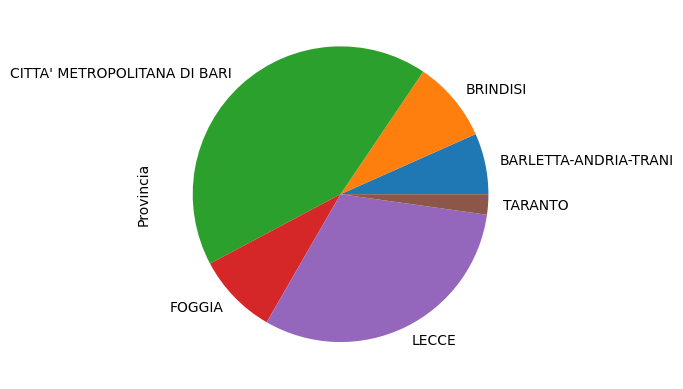

In [26]:
df["Regione"].unique()
dfregione = df[df["Regione"] == "Puglia"]
dfprovincia = dfregione.groupby("Provincia")["Provincia"].count()
plot = dfprovincia.plot(kind="pie", y="Provincia")
fig = plot.get_figure()
fig.savefig("itphones_outputs/puglia.png")

In [32]:
import folium

In [65]:
from datetime import datetime 
datetime.now().year

def ageToColor(year, m, M):
    colors = ["darkgreen", "green", "orange", "red"]
    curryear = datetime.now().year
    deltatot = M - m
    delta = M - year
    age = round(min((delta / deltatot) * 3, 3))
    return colors[age]

ageToColor(2015, 2007, 2016)

'darkgreen'

In [53]:

center = (41.902782, 12.496366)
m = folium.Map(center=center, zoom_start=10)
# Whole Italy
#bounds = [[46.62115209225544, 5.669698244577547], [36.04096044837196, 21.97861416589663]]

# Testing bounds
bounds = [[40.62115209225544, 12.669698244577547], [38.04096044837196, 15.97861416589663]]

m.fit_bounds(bounds)

def ageToColor(year):
    colors = ["darkgreen", "green", "orange", "red"]
    curryear = datetime.now().year
    age = min((curryear - year) // 6, 4)
    return colors[age]

def isInBounds(loc, bounds):
    lat = loc[0]
    lon = loc[1]
    ul = bounds[0]
    lr = bounds[1]
    return lat < ul[0] and lat > lr[0] and lon > ul[1] and lon < lr[1]

locations = list(zip(df["Latitudine"], df["Longitudine"]))
for i in range(len(locations)):
    loc = locations[i]
    if isInBounds(loc, bounds):
        color = ageToColor(df["Anno inserimento"][i])
        icon = folium.Icon(color=color, fill_color=color)
        marker = folium.Marker([loc[0], loc[1]], icon=icon)
        marker.add_to(m)
    
m.save("itphones_outputs/index.html")

In [57]:
df["Anno inserimento"].max()

2016